In [22]:
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

In [206]:
def sample(n):
    return np.random.randn(n)

In [228]:
def estimator_simple(r, bin_size):
    u = []
    for i in range(0, len(r), bin_size):
        r_i = r[i:i+bin_size]
        r2 = np.average(r_i**2)
        r4 = np.average(r_i**4)
        u.append(r4/r2**2)
    return np.average(u)

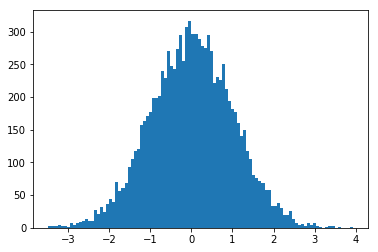

In [225]:
x = sample(10000)
fig, ax = plt.subplots()
n, bins, _ = ax.hist(x, bins=100)

In [253]:
n_total = 65536
r = sample(n_total)
bins = [16, 32,64,  256]
for bin_size in bins:
    u = estimator_simple(r, bin_size)
    print(f"{1.0/bin_size} {u}")

0.0625 2.6732091066516404
0.03125 2.836505305628396
0.015625 2.9318386271401025
0.00390625 3.0004222736653476


In [251]:
def estimator_jackknife(r, bin_size):
    u = []
    n = len(r)//bin_size
    r2 = r ** 2
    r4 = r ** 4
    r2 = [np.average(r2[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    r4 = [np.average(r4[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    for i in range(n):
        r2_i = np.average(np.delete(r2,i))
        r4_i = np.average(np.delete(r4,i))
        u.append(r4_i/r2_i**2)
    return np.average(u)

In [252]:
n_total = 256*256
r = sample(n_total)
bins = [16, 32, 64, 256]
for bin_size in bins:
    u = estimator_jackknife(r, bin_size)
    print(f"{1.0/bin_size} {u}")

0.0625 3.016663192677396
0.03125 3.016663169714568
0.015625 3.0166631348206865
0.00390625 3.0166629452331044


In [239]:
def langevin(n):
    h = 0.1          # 時間刻み
    gamma = 0.05      # 減衰係数
    v0 = 0.0         # 初速
    v = v0
    r = []
    for _ in range(n):
        v = v -gamma * v * h + np.random.normal(0, sqrt(h))
        r.append(v)
    return np.array(r)

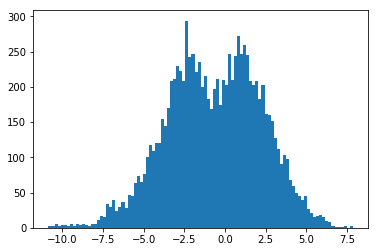

In [240]:
x = langevin(10000)
fig, ax = plt.subplots()
n, bins, _ = ax.hist(x, bins=100)

In [254]:
n_total = 65536
r = langevin(n_total)
bins = [16, 32, 64, 256]
for bin_size in bins:
    u = estimator_simple(r, bin_size)
    print(f"{1.0/bin_size} {u}")

0.0625 1.4120113920028068
0.03125 1.548770185268074
0.015625 1.6917955372888556
0.00390625 2.0562758607825122


In [256]:
n_total = 65536
r = langevin(n_total)
bins = [16, 32, 64, 256]
for bin_size in bins:
    u = estimator_jackknife(r, bin_size)
    print(f"{1.0/bin_size} {u}")

0.0625 2.790621978611674
0.03125 2.790621572665052
0.015625 2.790620306488452
0.00390625 2.7906067814020075


In [291]:
def compare_plot(r):
    bins = [16,32,64, 256]
    x = 1.0/np.array(bins)
    u_simple = []
    u_jackknife = []
    for bin_size in bins:
        u_simple.append(estimator_simple(r, bin_size))
        u_jackknife.append(estimator_jackknife(r, bin_size))
    plt.figure()
    fig, ax = plt.subplots()
    plt.xlabel("1 / n")
    plt.ylabel("estimated value")
    plt.ylim([0,3.2])
    ax.plot(x, u_simple,".-", lw=0.5, label="Simple")
    ax.plot(x, u_jackknife,".-", lw=0.5, label="Jackknife")

<Figure size 432x288 with 0 Axes>

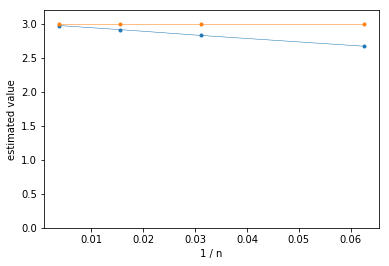

In [292]:
n_total = 65536
r = sample(n_total)
compare_plot(r)

<Figure size 432x288 with 0 Axes>

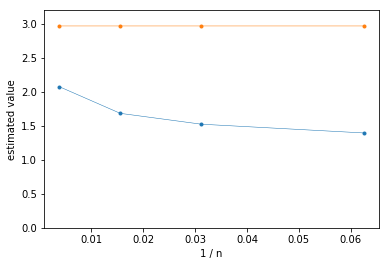

In [293]:
n_total = 65536
r = langevin(n_total)
compare_plot(r)